In [1]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

<Figure size 800x300 with 10 Axes>

In [3]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 35us/step - loss: 1.9370 - acc: 0.3142 - val_loss: 1.8937 - val_acc: 0.3465
Epoch 2/20
50000/50000 [==============================] - 1s 29us/step - loss: 1.8312 - acc: 0.3585 - val_loss: 1.8028 - val_acc: 0.3664
Epoch 3/20
50000/50000 [==============================] - 2s 34us/step - loss: 1.8064 - acc: 0.3720 - val_loss: 1.8535 - val_acc: 0.3551
Epoch 4/20
50000/50000 [==============================] - 2s 32us/step - loss: 1.7875 - acc: 0.3774 - val_loss: 1.8199 - val_acc: 0.3660
Epoch 5/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7706 - acc: 0.3865 - val_loss: 1.7639 - val_acc: 0.3829
Epoch 6/20
50000/50000 [==============================] - 2s 30us/step - loss: 1.7620 - acc: 0.3881 - val_loss: 1.7936 - val_acc: 0.3745
Epoch 7/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7504 - acc: 0.3972 - val_loss: 1.8153 - val_acc

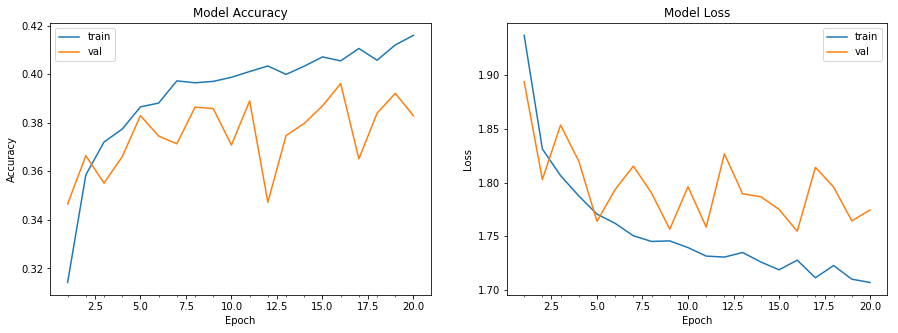

Training MLP took 30.746445894241333 seconds


In [6]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [7]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_2 = Sequential()
model_2.add(Flatten(input_shape=(32, 32, 3)))
model_2.add(Dense(50))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                153650    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 154,160
Trainable params: 154,160
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 42us/step - loss: 2.0545 - acc: 0.2997 - val_loss: 1.8992 - val_acc: 0.3462
Epoch 2/20
50000/50000 [==============================] - 2s 42us/step - loss: 1.8416 - acc: 0.3554 - val_loss: 1.8013 - val_acc: 0.3694
Epoch 3/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.8024 - acc: 0.3707 - val_loss: 1.8076 - val_acc: 0.3704
Epoch 4/20
50000/50000 [==============================] - 2s 42us/step - loss: 1.7753 - acc: 0.3813 - val_loss: 1.8297 - val_acc: 0.3552
Epoch 5/20
50000/50000 [==============================] - 2s 40us/step - loss: 1.7630 - acc: 0.3871 - val_loss: 1.8060 - val_acc: 0.3645
Epoch 6/20
50000/50000 [==============================] - 2s 39us/step - loss: 1.7491 - acc: 0.3925 - val_loss: 1.7891 - val_acc: 0.3784
Epoch 7/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.7441 - acc: 0.3961 - val_loss: 1.7538 - val_acc

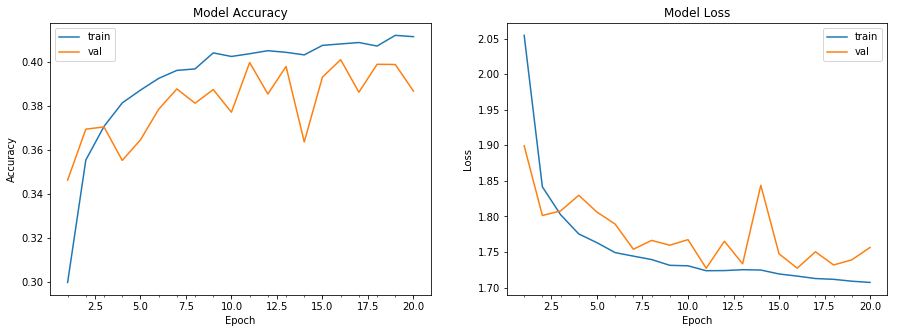

Training MLP took 39.99458408355713 seconds


In [8]:
# Training
import time
start = time.time()
history = model_2.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [9]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_3 = Sequential()
model_3.add(Flatten(input_shape=(32, 32, 3)))
model_3.add(Dense(1536))
model_3.add(Dense(600))
model_3.add(Dense(100))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1536)              4720128   
_________________________________________________________________
dense_5 (Dense)              (None, 600)               922200    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               60100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 5,703,438
Trainable params: 5,703,438
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 37s 739us/step - loss: 14.4672 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 39s 783us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 39s 782us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 38s 755us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 38s 758us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 37s 747us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 38s 766us/step - loss: 14.5063 - acc: 0.1000 -

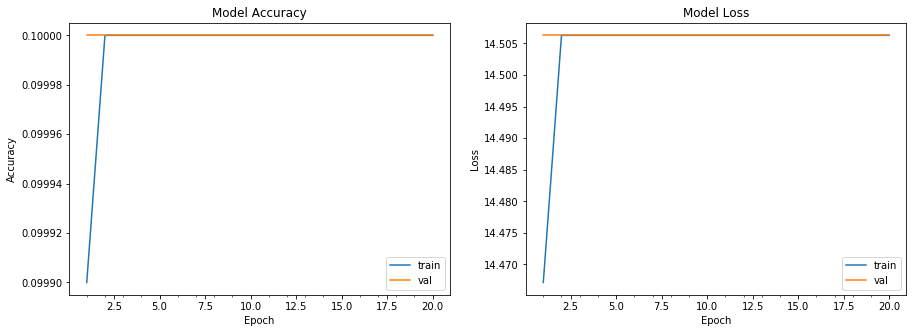

Training MLP took 884.3709239959717 seconds


In [10]:
# Training
import time
start = time.time()
history = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model_3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [11]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

model_4 = Sequential()
model_4.add(Flatten(input_shape=(32, 32, 3)))
model_4.add(Dense(500))
model_4.add(Dense(100))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_9 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 1,587,610
Trainable params: 1,587,610
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 18s 359us/step - loss: 13.5035 - acc: 0.1383 - val_loss: 13.4192 - val_acc: 0.1437
Epoch 2/20
50000/50000 [==============================] - 18s 366us/step - loss: 5.2593 - acc: 0.2729 - val_loss: 1.8119 - val_acc: 0.3664
Epoch 3/20
50000/50000 [==============================] - 17s 333us/step - loss: 1.8167 - acc: 0.3602 - val_loss: 1.8136 - val_acc: 0.3505
Epoch 4/20
50000/50000 [==============================] - 17s 342us/step - loss: 1.7922 - acc: 0.3717 - val_loss: 1.7923 - val_acc: 0.3695
Epoch 5/20
50000/50000 [==============================] - 16s 320us/step - loss: 1.7899 - acc: 0.3727 - val_loss: 1.8476 - val_acc: 0.3519
Epoch 6/20
50000/50000 [==============================] - 15s 295us/step - loss: 1.7834 - acc: 0.3762 - val_loss: 1.8145 - val_acc: 0.3660
Epoch 7/20
50000/50000 [==============================] - 13s 263us/step - loss: 1.7849 - acc: 0.3743 - val_loss: 

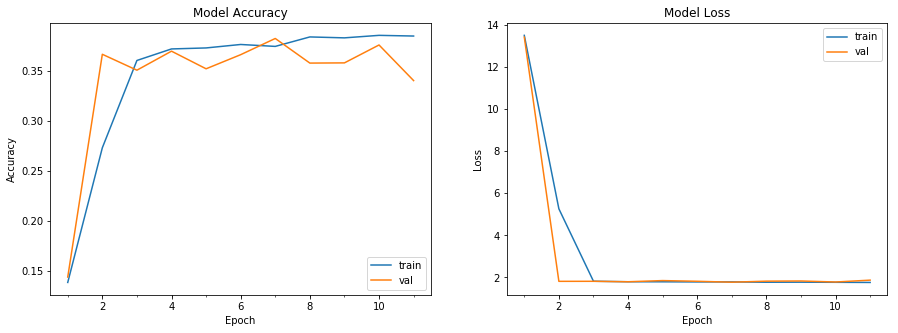

Training MLP took 160.31894302368164 seconds


In [12]:
# Training
import time
start = time.time()
history = model_4.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])
end = time.time()

loss, acc = model_4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [13]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_5 = Sequential()
model_5.add(Flatten(input_shape=(32, 32, 3)))
model_5.add(Dense(500))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 214us/step - loss: 8.3773 - acc: 0.2114 - val_loss: 7.3639 - val_acc: 0.2672
Epoch 2/20
50000/50000 [==============================] - 10s 203us/step - loss: 7.3358 - acc: 0.2549 - val_loss: 6.4022 - val_acc: 0.2399
Epoch 3/20
50000/50000 [==============================] - 10s 197us/step - loss: 5.2573 - acc: 0.2780 - val_loss: 4.8762 - val_acc: 0.2327
Epoch 4/20
50000/50000 [==============================] - 10s 203us/step - loss: 3.9969 - acc: 0.3123 - val_loss: 3.3626 - val_acc: 0.2952
Epoch 5/20
50000/50000 [==============================] - 10s 209us/step - loss: 1.9819 - acc: 0.3499 - val_loss: 1.9664 - val_acc: 0.3360
Epoch 6/20
50000/50000 [==============================] - 10s 204us/step - loss: 1.8047 - acc: 0.3731 - val_loss: 1.7720 - val_acc: 0.3845
Epoch 7/20
50000/50000 [==============================] - 10s 208us/step - loss: 1.7852 - acc: 0.3788 - val_loss: 1.

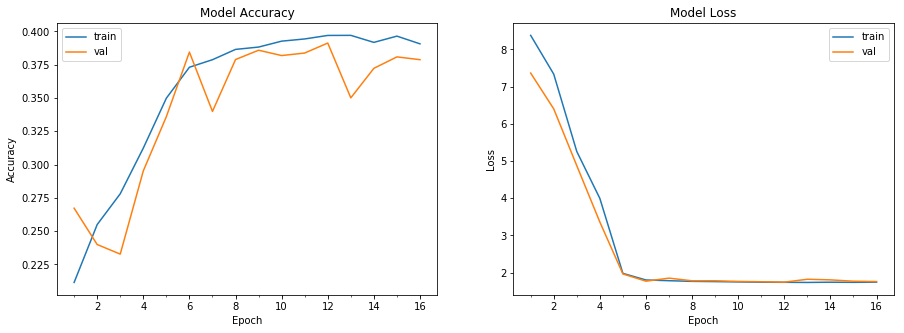

Training MLP took 212.84273099899292 seconds


In [14]:
# Training
import time
start = time.time()
history = model_5.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])
end = time.time()

loss, acc = model_5.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")